# **Лабораторная работа №4**

### **Цель работы:** изучение алгоритмов кластеризации, приобретение навыков оценки качества разбиения данных на кластеры и интерпретации результатов.

# **Описание датасета**

Для выполнения РГЗ был выбран датасет **Avila-tr**

Датасет содержит 11 числовых признаков, из них: 10 числовых признаков и 1 категориальный признак (метка класса), описывающие характеристики рукописных символов

| №  | Название признака     | Тип признака            | Описание                                                       |
| -- | --------------------- | ----------------------- | -------------------------------------------------------------- |
| 1  | Horizontal_Projection | Числовой (вещественный) | Характеристика горизонтального распределения элементов символа |
| 2  | Vertical_Projection   | Числовой (вещественный) | Характеристика вертикального распределения элементов           |
| 3  | Stroke_Density        | Числовой (вещественный) | Плотность штрихов символа                                      |
| 4  | Curvature             | Числовой (вещественный) | Показатель кривизны или сложности формы                        |
| 5  | Aspect_Ratio          | Числовой (вещественный) | Отношение размеров символа (пропорции)                         |
| 6  | Pixel_Intensity       | Числовой (вещественный) | Средняя интенсивность или насыщенность пикселей                |
| 7  | Structural_Complexity | Числовой (вещественный) | Степень структурной сложности символа                          |
| 8  | Symmetry              | Числовой (вещественный) | Характеристика симметричности формы                            |
| 9  | Compactness           | Числовой (вещественный) | Мера компактности и сгруппированности элементов                |
| 10 | Texture_Variation     | Числовой (вещественный) | Вариативность текстуры или мелких деталей                      |
| 11 | Class                 | Категориальный          | Истинный класс символа (A, F, H, I, E, Y и др.)                |




### Импорт библиотек

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import f_oneway
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import rand_score, adjusted_rand_score, jaccard_score
from sklearn.metrics import pairwise_distances

# 1. Дескриптивный анализ данных

### Загрузка данных

In [54]:
columns = [
    'Horizontal_Projection',
    'Vertical_Projection',
    'Stroke_Density',
    'Curvature',
    'Aspect_Ratio',
    'Pixel_Intensity',
    'Structural_Complexity',
    'Symmetry',
    'Compactness',
    'Texture_Variation',
    'Class'
]

df = pd.read_csv(
    'avila-tr.txt',
    header=None,
    names=columns
)

df.head()


,Horizontal_Projection,Vertical_Projection,Stroke_Density,Curvature,Aspect_Ratio,Pixel_Intensity,Structural_Complexity,Symmetry,Compactness,Texture_Variation,Class
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F


### Размерность датасета

- 10428— количество объектов

- 11 — количество признаков

In [55]:
df.shape

(10428, 11)

### Типы признаков

In [56]:
pd.DataFrame({
    "Признак": df.columns,
    "Тип данных": df.dtypes.values
})


,Признак,Тип данных
0,Horizontal_Projection,float64
1,Vertical_Projection,float64
2,Stroke_Density,float64
3,Curvature,float64
4,Aspect_Ratio,float64
5,Pixel_Intensity,float64
6,Structural_Complexity,float64
7,Symmetry,float64
8,Compactness,float64
9,Texture_Variation,float64


### Проверка наличия пропусков

In [57]:
df.isnull().sum()

Horizontal_Projection    0
Vertical_Projection      0
Stroke_Density           0
Curvature                0
Aspect_Ratio             0
Pixel_Intensity          0
Structural_Complexity    0
Symmetry                 0
Compactness              0
Texture_Variation        0
Class                    0
dtype: int64

Датасет не содержит пропусков

# Оценка распределения переменных

### Отделяем числовые признаки

- X — только числовые признаки 

- y — метки классов 

In [58]:
X = df.drop(columns=["Class"])

y = df["Class"]

### Гистограммы распределений признаков

Проверка нормальности распределений проводилась с использованием критерия Колмогорова–Смирнова при уровне значимости α = 0.05. 

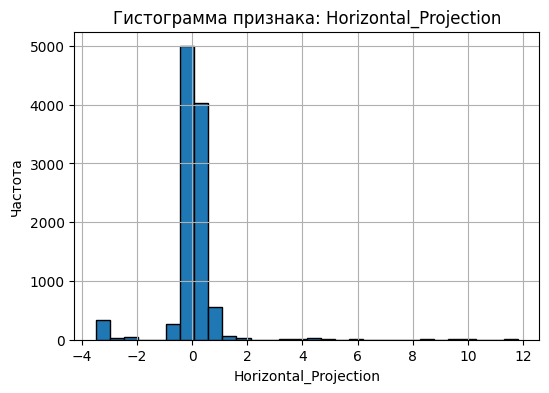

KS statistic = 0.2804
p-value = 0.0000e+00
Вывод: гипотеза о нормальности распределения отвергается



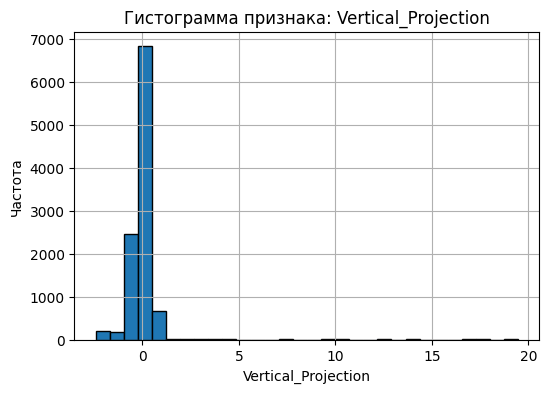

KS statistic = 0.2457
p-value = 0.0000e+00
Вывод: гипотеза о нормальности распределения отвергается



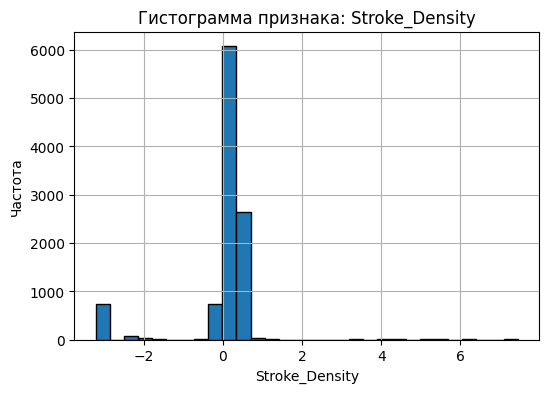

KS statistic = 0.3697
p-value = 0.0000e+00
Вывод: гипотеза о нормальности распределения отвергается



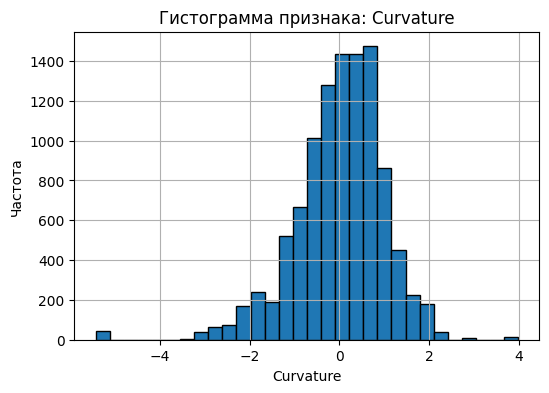

KS statistic = 0.0558
p-value = 1.0964e-28
Вывод: гипотеза о нормальности распределения отвергается



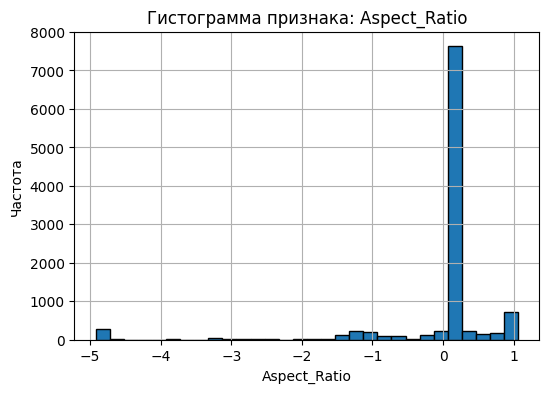

KS statistic = 0.3831
p-value = 0.0000e+00
Вывод: гипотеза о нормальности распределения отвергается



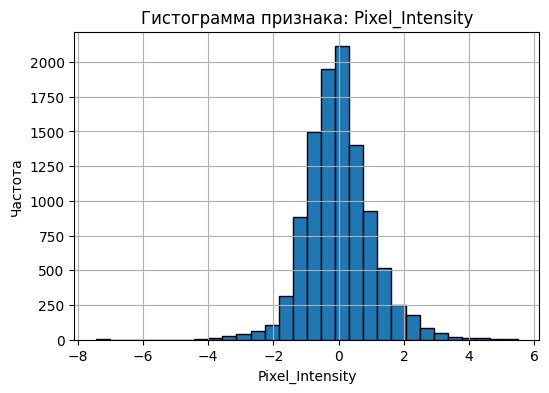

KS statistic = 0.0518
p-value = 8.6582e-25
Вывод: гипотеза о нормальности распределения отвергается



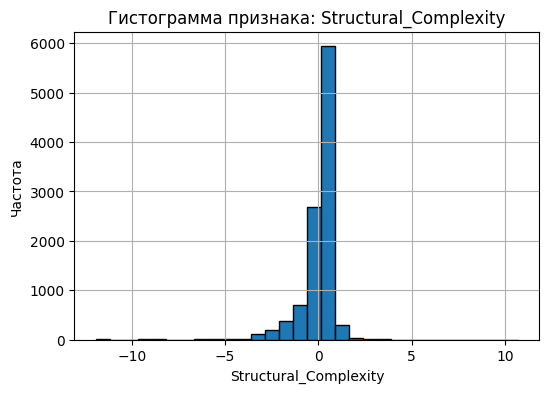

KS statistic = 0.2492
p-value = 0.0000e+00
Вывод: гипотеза о нормальности распределения отвергается



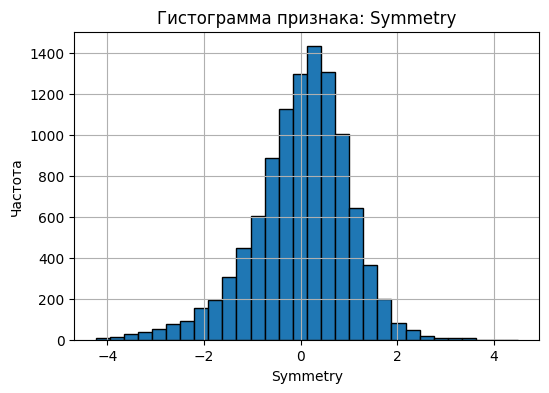

KS statistic = 0.0504
p-value = 1.8402e-23
Вывод: гипотеза о нормальности распределения отвергается



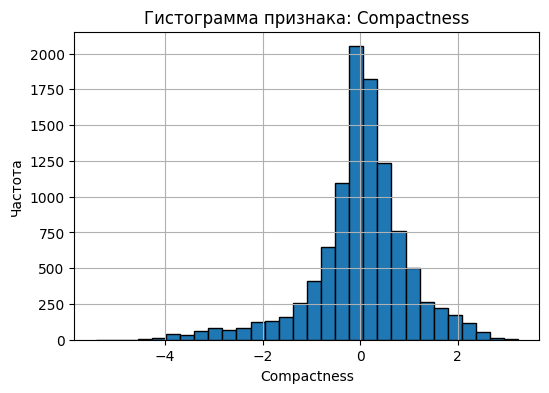

KS statistic = 0.1127
p-value = 7.2305e-116
Вывод: гипотеза о нормальности распределения отвергается



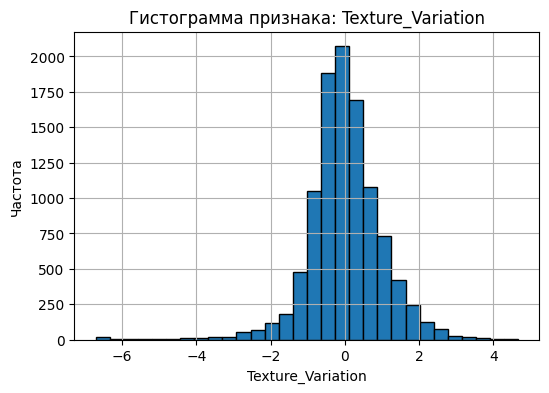

KS statistic = 0.0666
p-value = 1.1275e-40
Вывод: гипотеза о нормальности распределения отвергается



In [59]:
alpha = 0.05

for column in X.columns:
    feature = X[column]

    feature_std = (feature - feature.mean()) / feature.std(ddof=0)

    ks_stat, p_value = stats.kstest(feature_std, 'norm')

    plt.figure(figsize=(6, 4))
    plt.hist(feature, bins=30, edgecolor='black')
    plt.title(f"Гистограмма признака: {column}")
    plt.xlabel(column)
    plt.ylabel("Частота")
    plt.grid(True)
    plt.show()

    print(f"KS statistic = {ks_stat:.4f}")
    print(f"p-value = {p_value:.4e}")

    if p_value > alpha:
        print("Вывод: гипотеза о нормальности распределения НЕ отвергается\n")
    else:
        print("Вывод: гипотеза о нормальности распределения отвергается\n")

**Вывод:** анализ показал, что распределения числовых признаков отличаются от нормального.

# Оценка информационной значимости признаков

### Корреляционный анализ

Анализируем только числовые признаки

In [60]:
corr_matrix = X.corr(method="pearson")
corr_matrix

,Horizontal_Projection,Vertical_Projection,Stroke_Density,Curvature,Aspect_Ratio,Pixel_Intensity,Structural_Complexity,Symmetry,Compactness,Texture_Variation
Horizontal_Projection,1.000000,-0.139255,0.037296,-0.067297,0.451099,-0.053017,-0.005438,-0.039244,0.062989,-0.005112
Vertical_Projection,-0.139255,1.000000,-0.017172,0.025194,-0.257509,-0.059193,-0.022776,0.103237,-0.122986,-0.097841
Stroke_Density,0.037296,-0.017172,1.000000,0.157516,0.011160,-0.088556,0.023183,0.041995,0.022691,-0.055662
Curvature,-0.067297,0.025194,0.157516,1.000000,0.094142,0.286715,0.048997,0.349125,0.303587,0.321596
Aspect_Ratio,0.451099,-0.257509,0.011160,0.094142,1.000000,0.041570,0.028519,-0.065703,0.297584,0.148960
Pixel_Intensity,-0.053017,-0.059193,-0.088556,0.286715,0.041570,1.000000,0.249049,-0.059791,0.035167,0.847873
Structural_Complexity,-0.005438,-0.022776,0.023183,0.048997,0.028519,0.249049,1.000000,0.015851,0.032216,0.325273
Symmetry,-0.039244,0.103237,0.041995,0.349125,-0.065703,-0.059791,0.015851,1.000000,0.542034,-0.007749
Compactness,0.062989,-0.122986,0.022691,0.303587,0.297584,0.035167,0.032216,0.542034,1.000000,0.197327
Texture_Variation,-0.005112,-0.097841,-0.055662,0.321596,0.148960,0.847873,0.325273,-0.007749,0.197327,1.000000


### Визуализация корреляционной матрицы

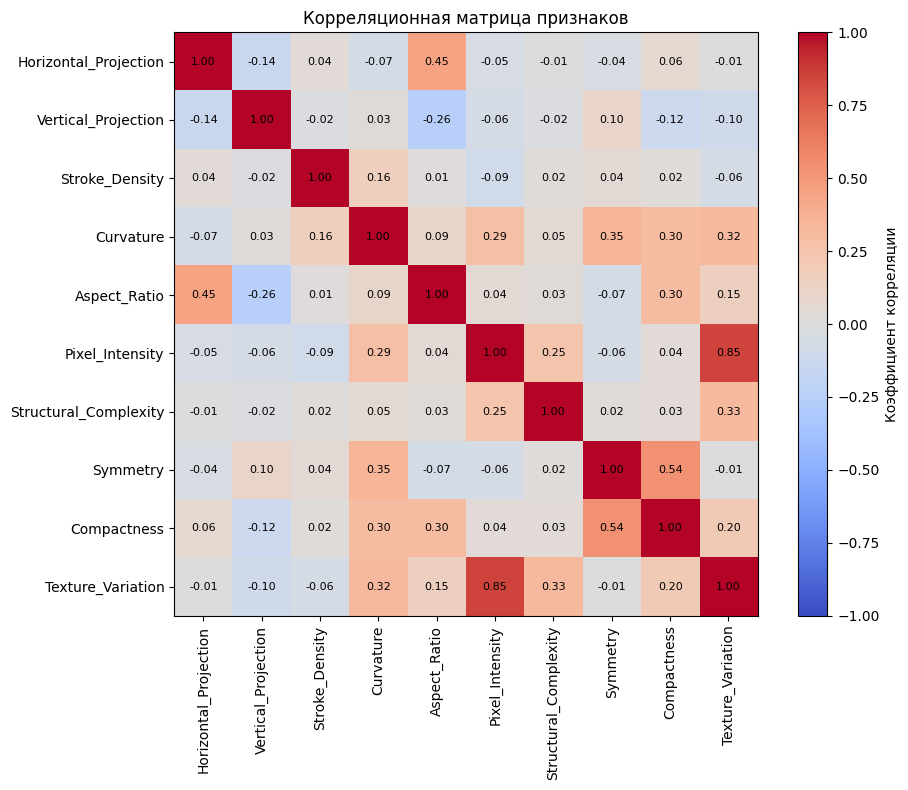

In [61]:
corr_matrix = X.corr(method="pearson")

plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1)
plt.colorbar(label="Коэффициент корреляции")

plt.xticks(
    range(len(corr_matrix.columns)),
    corr_matrix.columns,
    rotation=90
)
plt.yticks(
    range(len(corr_matrix.columns)),
    corr_matrix.columns
)

for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        plt.text(
            j, i,
            f"{corr_matrix.iloc[i, j]:.2f}",
            ha="center",
            va="center",
            fontsize=8
        )

plt.title("Корреляционная матрица признаков")
plt.tight_layout()
plt.show()



Удаляем сильно коррелирующие признаки с целью устранения избыточности информации и снижения мультиколлинеарности. Порог корреляции |r| ≥ 0.45 был выбран с учётом специфики задач кластеризации, чувствительных к взаимосвязанным признакам.

In [62]:
threshold = 0.45

corr_matrix = X.corr().abs()

upper_triangle = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

to_drop = [
    column for column in upper_triangle.columns
    if any(upper_triangle[column] >= threshold)
]

X_reduced = X.drop(columns=to_drop)

to_drop


['Aspect_Ratio', 'Compactness', 'Texture_Variation']

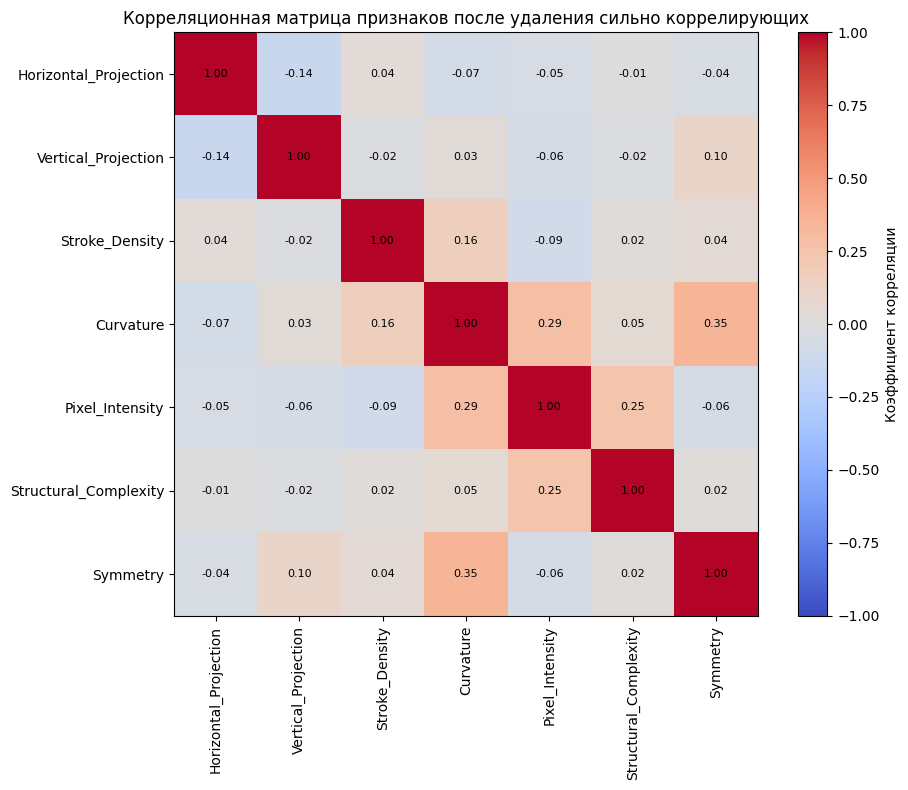

In [63]:
X_reduced = X.drop(columns=to_drop)

corr_matrix_reduced = X_reduced.corr(method="pearson")

plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix_reduced, cmap="coolwarm", vmin=-1, vmax=1)
plt.colorbar(label="Коэффициент корреляции")

plt.xticks(
    range(len(corr_matrix_reduced.columns)),
    corr_matrix_reduced.columns,
    rotation=90
)
plt.yticks(
    range(len(corr_matrix_reduced.columns)),
    corr_matrix_reduced.columns
)

for i in range(len(corr_matrix_reduced.columns)):
    for j in range(len(corr_matrix_reduced.columns)):
        plt.text(
            j, i,
            f"{corr_matrix_reduced.iloc[i, j]:.2f}",
            ha="center",
            va="center",
            fontsize=8
        )

plt.title("Корреляционная матрица признаков после удаления сильно коррелирующих")
plt.tight_layout()
plt.show()




**Вывод:** В результате корреляционного анализа были удалены избыточные признаки: Aspect_Ratio, Compactness и Texture_Variation. Что позволило сформировать компактное и менее коррелированное признаковое пространство, пригодное для дальнейшей кластеризации.

# Дисперсионный анализ 

Используем однофакторный дисперсионный анализ (ANOVA). Данный метод позволяет определить, существуют ли статистически значимые различия средних значений признаков между несколькими группами.

**Формулировка гипотез**

- Нулевая гипотеза (H₀): средние значения исследуемого признака одинаковы для всех классов.

- Альтернативная гипотеза (H₁): существует хотя бы одна пара классов, для которых средние значения признака различаются статистически значимо.

Проверка гипотез осуществляется на основе значения F-статистики и соответствующего p-value.

**Уровень значимости**

α=0.05

Если значение p-value меньше α, нулевая гипотеза отвергается, и признак считается статистически значимым.

In [64]:
anova_results = []

for feature in X.columns:
    groups = [
        X.loc[y == cls, feature]
        for cls in y.unique()
    ]

    f_stat, p_value = f_oneway(*groups)

    anova_results.append({
        "Признак": feature,
        "F-статистика": f_stat,
        "p-value": p_value
    })

anova_df = pd.DataFrame(anova_results).sort_values(
    by="F-статистика", ascending=False
)

anova_df



,Признак,F-статистика,p-value
8,Compactness,270.609253,0.000000e+00
6,Structural_Complexity,165.502618,0.000000e+00
3,Curvature,143.961119,8.772713e-310
1,Vertical_Projection,119.029411,8.134932e-258
5,Pixel_Intensity,117.016461,1.432407e-253
4,Aspect_Ratio,82.021063,1.500647e-178
0,Horizontal_Projection,69.431026,5.269003e-151
9,Texture_Variation,63.873702,9.360272e-139
7,Symmetry,30.642129,1.654266e-64
2,Stroke_Density,16.347513,2.229279e-32


# Визуализация 

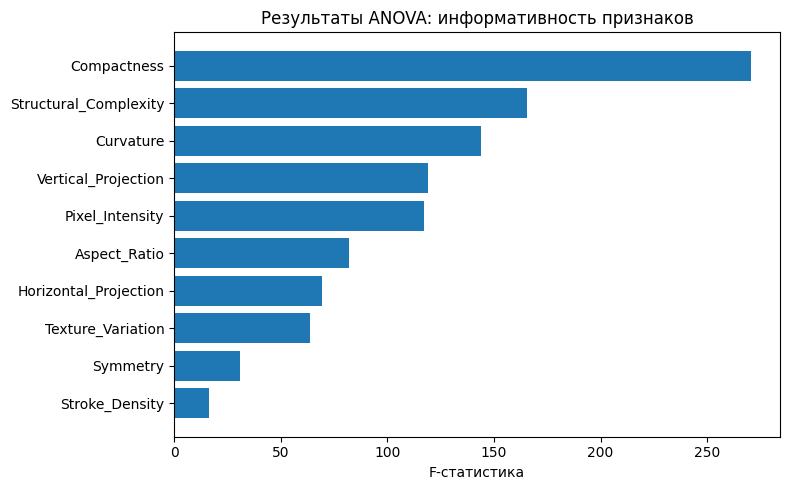

In [65]:
plt.figure(figsize=(8, 5))

plt.barh(
    anova_df.sort_values("F-статистика")["Признак"],
    anova_df.sort_values("F-статистика")["F-статистика"]
)

plt.xlabel("F-статистика")
plt.title("Результаты ANOVA: информативность признаков")
plt.tight_layout()
plt.show()


Вывод: результаты ANOVA показали статистическую значимость всех признаков (p-value < 0.05). Наиболее информативными являются признаки Compactness, Curvature и Structural_Complexity. Полученные результаты подтверждают корректность выбранного признакового пространства.

# Проверка условия применения кластеризации

**1. Отсутствие априорных классов**

Кластеризация относится к методам обучения без учителя и предполагает отсутствие априорного разбиения объектов на классы. В рассматриваемом датасете присутствует категориальный признак, содержащий метки классов объектов. Однако данные метки не используются в процессе кластеризации и были исключены из признакового пространства перед выполнением кластерного анализа.

**2. Осмысленность кластеризации**

Осмысленность применения методов кластеризации определяется наличием информативных признаков и внутренней структуры в данных. Для оценки данного условия был проведён корреляционный и дисперсионный анализ признаков.

В ходе корреляционного анализа были выявлены признаки с высокой степенью взаимосвязи. Для уменьшения избыточности и повышения устойчивости модели признаки с коэффициентом корреляции |r| > 0.45 были исключены из дальнейшего анализа. Это позволило сформировать более компактное и интерпретируемое признаковое пространство.

Результаты дисперсионного анализа, включая однофакторный ANOVA, показали, что все оставшиеся признаки обладают статистически значимыми различиями между классами при уровне значимости α = 0.05. Это свидетельствует о достаточной информативности признаков и подтверждает целесообразность применения методов кластеризации к данному датасету.

### Анализ выбросов с использованием диаграмм «ящик с усами»

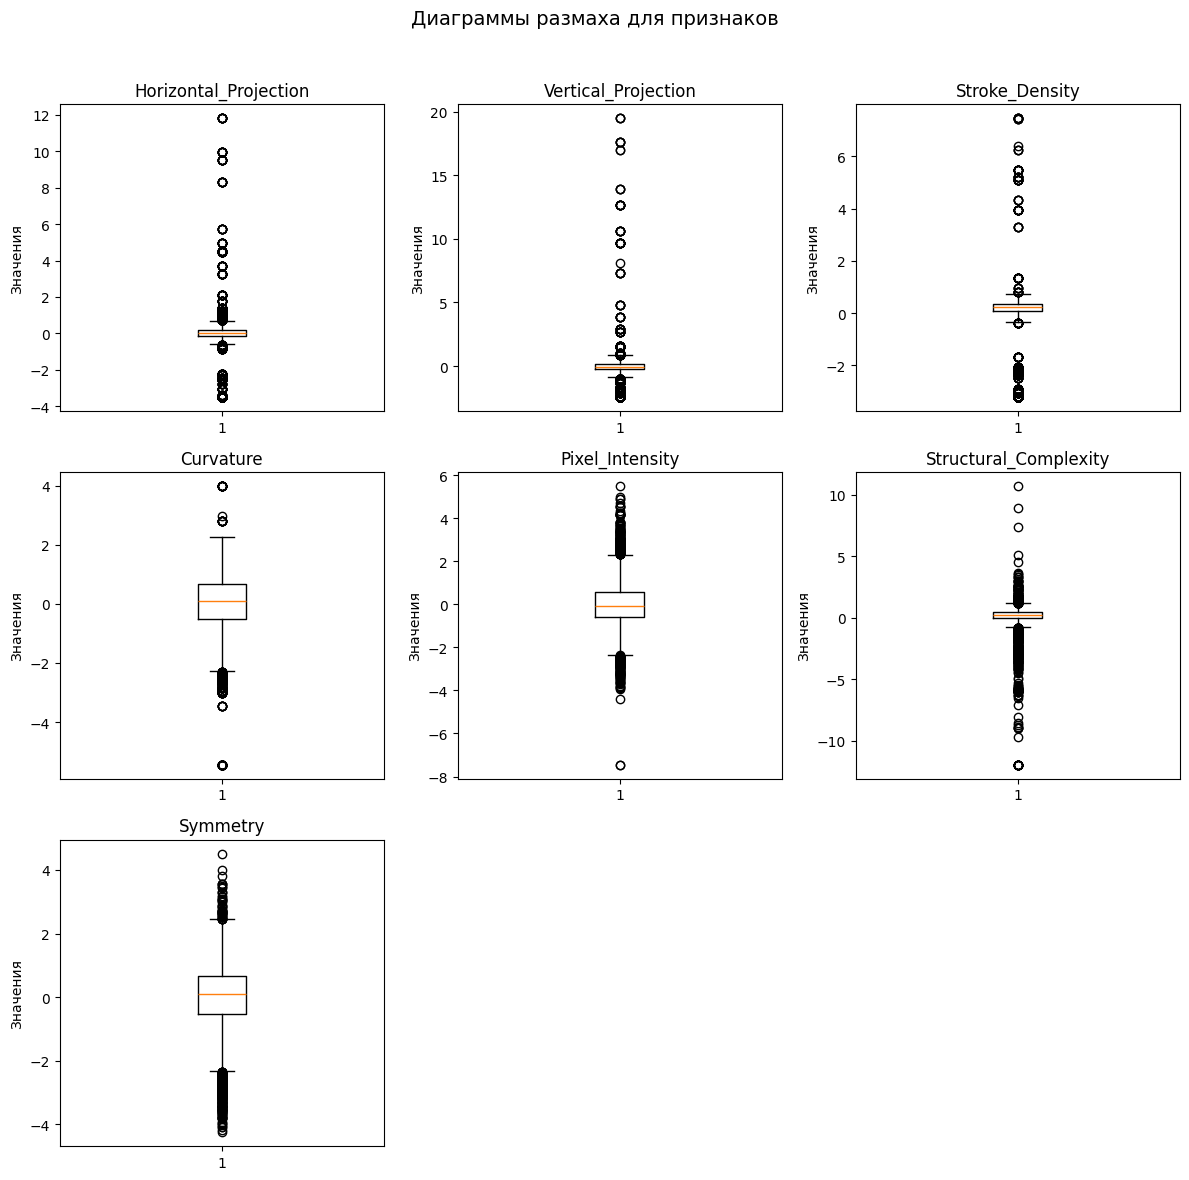

In [66]:
cols = X_reduced.columns
n_cols = 3                    
n_rows = math.ceil(len(cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()

for i, column in enumerate(cols):
    axes[i].boxplot(X_reduced[column], showfliers=True)
    axes[i].set_title(column)
    axes[i].set_ylabel("Значения")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Диаграммы размаха для признаков", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Удаляем признаки с большим количеством выбросов
Horizontal_Projection и Vertical_Projection характеризуются большим количеством выбросов и слабо выраженной центральной тенденцией.

 Кроме того, визуальный анализ диаграмм рассеивания показал отсутствие чёткой кластерной структуры по данным признакам. В связи с этим данные признаки были исключены из дальнейшего анализа как малоинформативные для задач кластеризации.

In [67]:
features_to_remove_outliers = [
    'Horizontal_Projection',
    'Vertical_Projection',
    'Stroke_Density'
]

X_final = X_reduced.drop(columns=features_to_remove_outliers)

print("Размерность X_final:", X_final.shape)
print("Итоговые признаки:", list(X_final.columns))


Размерность X_final: (10428, 4)
Итоговые признаки: ['Curvature', 'Pixel_Intensity', 'Structural_Complexity', 'Symmetry']


**Вывод:** анализ диаграмм выявил наличие значительного числа выбросов. Прямое удаление наблюдений не применялось.

 Вместо этого были исключены признаки с наибольшим количеством и амплитудой выбросов: Horizontal_Projection, Vertical_Projection. Такой подход позволил снизить влияние экстремальных значений без потери общей структуры данных.

# 2. Стандартизация числовых признаков

Для масштабирования числовых признаков была использована стандартизация с применением метода StandardScaler. Данный метод был выбран, поскольку исходные признаки имеют разные масштабы, а планируемые методы кластеризации основаны на вычислении расстояний и чувствительны к масштабу данных.

In [68]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_final)

X_scaled = pd.DataFrame(
    X_scaled,
    columns=X_final.columns,
    index=X_final.index
)

X_scaled.head()


,Curvature,Pixel_Intensity,Structural_Complexity,Symmetry
0,0.481728,0.264557,0.363090,0.925193
1,0.063916,1.430781,1.430524,0.630169
2,-0.775706,0.431160,-0.078606,-0.901564
3,-0.577569,-0.318555,0.694363,1.047646
4,0.083914,0.139605,0.620747,0.042228


<Figure size 1200x1200 with 0 Axes>

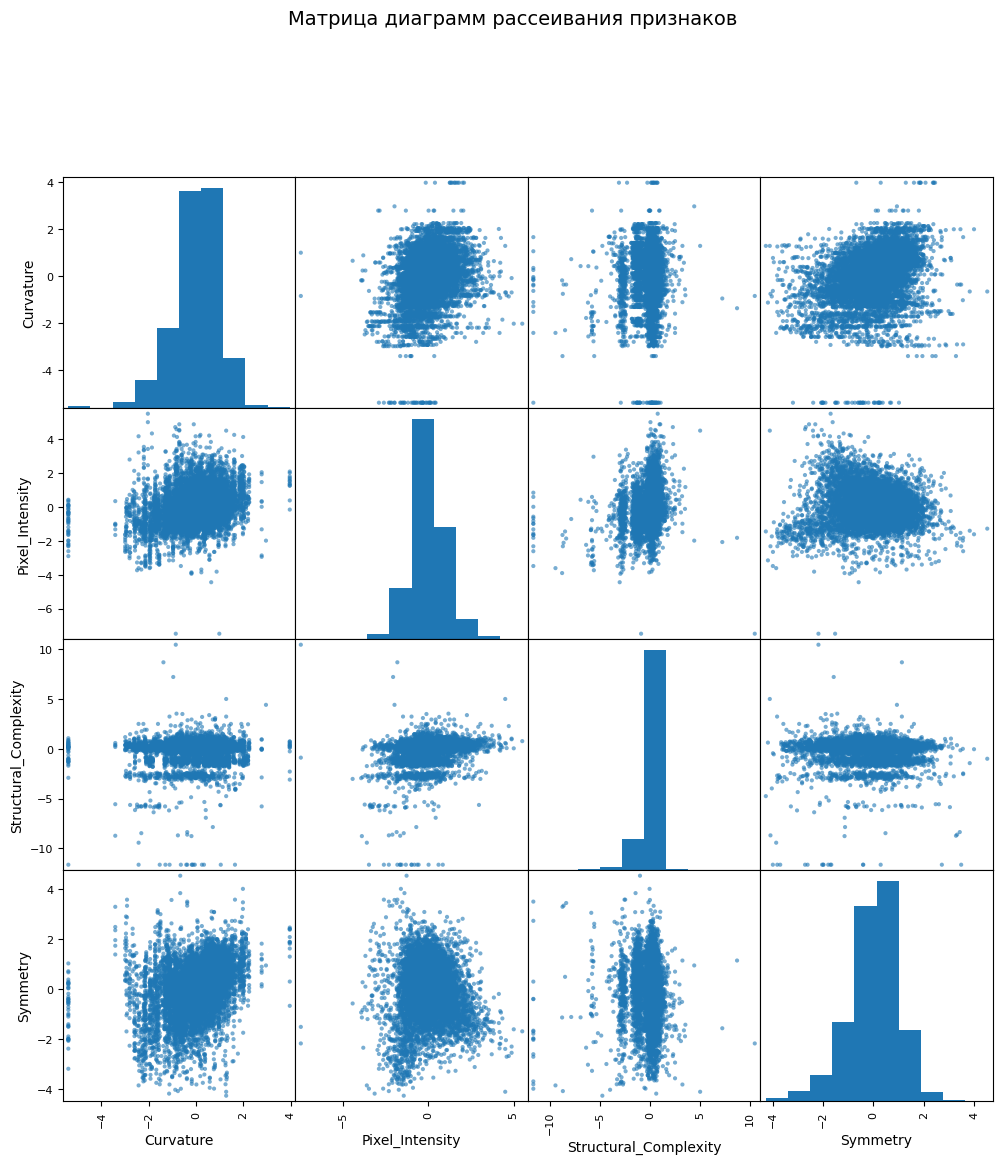

In [69]:
plt.figure(figsize=(12, 12))

scatter_matrix(
    X_scaled,
    figsize=(12, 12),
    diagonal='hist',
    alpha=0.6
)

plt.suptitle(
    "Матрица диаграмм рассеивания признаков",
    fontsize=14,
    y=1.02
)

plt.show()


**Вывод:** Анализ матрицы диаграмм рассеивания показал наличие областей повышенной плотности наблюдений, однако чётко разделённых и изолированных кластеров не наблюдается. В большинстве проекций признаки формируют вытянутые и частично перекрывающиеся группы, что указывает на сложную структуру данных.

По визуальной оценке можно предположить наличие 2–3 кластеров, при этом их форма не является строго сферической. Кластерная структура характеризуется различной плотностью и размытыми границами, что затрудняет однозначное визуальное разделение.

С учётом выявленных особенностей для дальнейшего анализа были выбраны два метода кластеризации:

-	K-means используется как базовый метод для выявления компактных кластеров и оценки оптимального числа кластеров при условии приблизительно равномерной плотности и компактности групп.
-	DBSCAN выбран как метод, способный выявлять кластеры произвольной формы и различной плотности, а также корректно обрабатывать шумовые наблюдения, что особенно важно при наличии размытых границ и выбросов.
Совместное применение данных методов позволяет сравнить кластеризацию, основанную на предположении о компактности кластеров, с подходом, не требующим задания числа кластеров и более устойчивым к шуму.


# 3. Реализация K-means и DBSCAN

## K-means

**Метод k-средних** — итерационный алгоритм кластерного анализа, при котором множество объектов разбивается на k кластеров так, чтобы минимизировать сумму внутрикластерных расстояний до центров кластеров.

Алгоритм является однопараметрическим — требуется задать только число кластеров k.

### Подбор числа кластеров для K-means

Для определения оптимального числа кластеров были использованы метод локтя и силуэтный анализ.

In [70]:
inertia = []
silhouette_scores = []

K_range = range(2, 8)

for k in K_range:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    labels = kmeans.fit_predict(X_scaled)
    
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(
        silhouette_score(X_scaled, labels)
    )

### Визуализация метода локтя и силуэтного анализа

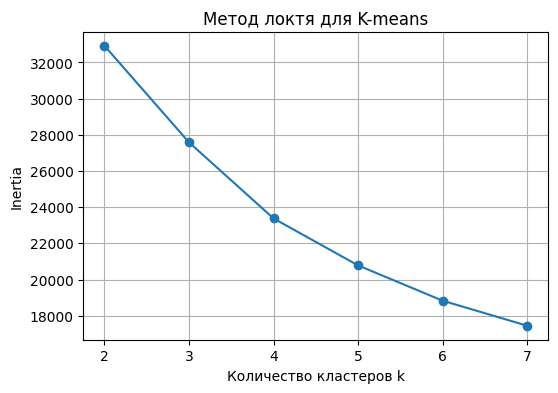

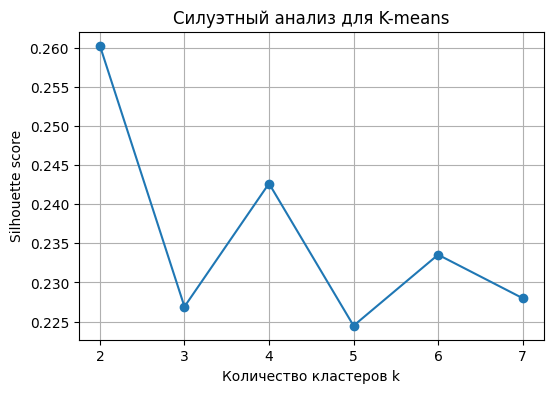

In [71]:
plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Количество кластеров k")
plt.ylabel("Inertia")
plt.title("Метод локтя для K-means")
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel("Количество кластеров k")
plt.ylabel("Silhouette score")
plt.title("Силуэтный анализ для K-means")
plt.grid(True)
plt.show()

- Метод локтя демонстрирует наиболее выраженное изменение характера кривой при k=2, после чего снижение внутрикластерной дисперсии становится более плавным. Это может свидетельствовать о наличии в данных одной основной грубой структуры.

- Силуэтный анализ также показывает наибольшее значение среднего силуэтного коэффициента при k=2. При этом абсолютные значения силуэтного коэффициента остаются умеренными, что указывает на частичное перекрытие кластеров и отсутствие чётко выраженных границ между ними.

**Вывод:** на основании совокупного анализа метода локтя и силуэтного коэффициента можно сделать вывод, что выбор k=2 является обоснованным и адекватно отражает наиболее устойчивую кластерную структуру данных.

In [72]:
k = 2

kmeans = KMeans(
    n_clusters=k,
    random_state=42,
    n_init=10
)

clusters_kmeans = kmeans.fit_predict(X_scaled)

X_kmeans = X_scaled.copy()
X_kmeans['Cluster'] = clusters_kmeans

X_kmeans['Cluster'].value_counts().sort_index()

Cluster
0    3445
1    6983
Name: count, dtype: int64

### Визуализация кластеров

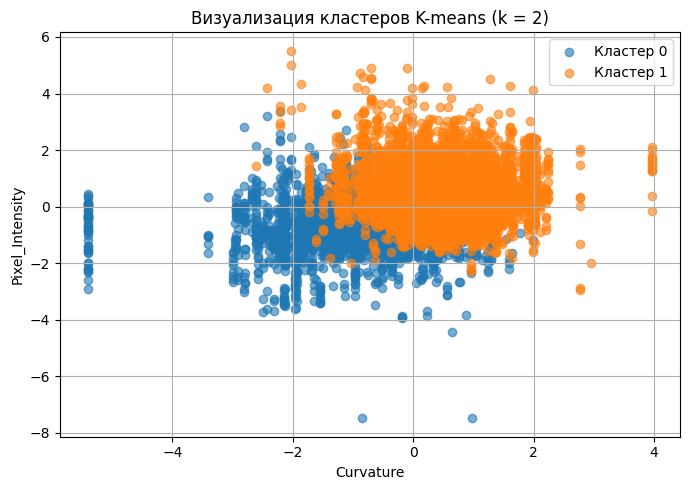

In [73]:
plt.figure(figsize=(7, 5))

for cluster in sorted(X_kmeans['Cluster'].unique()):
    subset = X_kmeans[X_kmeans['Cluster'] == cluster]
    plt.scatter(
        subset['Curvature'],
        subset['Pixel_Intensity'],
        label=f'Кластер {cluster}',
        alpha=0.6
    )

plt.xlabel('Curvature')
plt.ylabel('Pixel_Intensity')
plt.title('Визуализация кластеров K-means (k = 2)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



**Вывод:** метод K-means выделил два компактных кластера, которые хорошо разделяются по совокупности геометрических и интенсивностных характеристик. Кластеры отражают глобальное бинарное разбиение данных на простые и более сложные по форме символы.

### Интерпретация кластеров K-means

#### Кластер 0

- Отрицательные значения Curvature

- Пониженная Pixel_Intensity

- Более низкая Symmetry

Символы с более простой, менее симметричной формой и слабой кривизной. Вероятно, это символы с преобладанием прямых линий и менее выраженной структурой.

#### Кластер 1

- Положительные значения Curvature

- Повышенная Pixel_Intensity

- Более высокая Symmetry

Символы с более простой, менее симметричной формой и слабой кривизной. Вероятно, это символы с преобладанием прямых линий и менее выраженной структурой.

## DBSCAN

Алгоритм DBSCAN (Density-Based Spatial Clustering of Applications with Noise) — один из базовых плотностных алгоритмов кластеризации, учитывающий наличие шума.

Алгоритм DBSCAN требует задания двух параметров: 
- ε - радиуса окрестности 
- min_samples - минимального числа точек 

Параметр min_samples был зафиксирован на уровне 5 в соответствии с рекомендацией, согласно которой его значение выбирается как размерность пространства признаков плюс единица.

Основное внимание было уделено подбору параметра ε, поскольку именно он существенно влияет на структуру кластеров. Для его определения использовался график расстояний до k-го ближайшего соседа (k-distance plot), построенный с применением алгоритма NearestNeighbors.

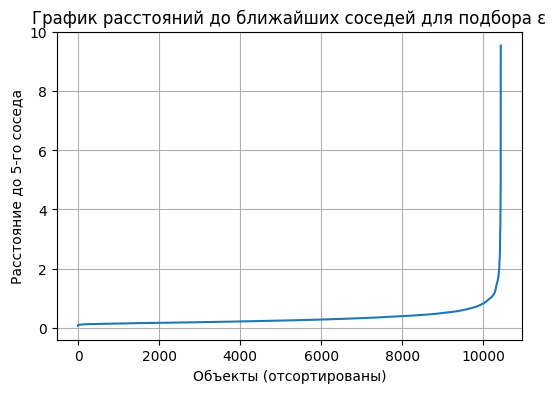

In [74]:
min_samples = 5  

neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:, min_samples - 1])

plt.figure(figsize=(6, 4))
plt.plot(distances)
plt.xlabel("Объекты (отсортированы)")
plt.ylabel(f"Расстояние до {min_samples}-го соседа")
plt.title("График расстояний до ближайших соседей для подбора ε")
plt.grid(True)
plt.show()


Значение ε = 1.7 было выбрано в области излома кривой, что позволяет отделить плотные области данных от разреженных и шумовых наблюдений.

In [75]:
eps = 1.7      
min_samples = 5   

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters_dbscan = dbscan.fit_predict(X_scaled)

X_dbscan = X_scaled.copy()
X_dbscan['Cluster'] = clusters_dbscan

n_clusters = len(set(clusters_dbscan)) - (1 if -1 in clusters_dbscan else 0)
n_noise = list(clusters_dbscan).count(-1)

n_clusters, n_noise

(3, 37)

**Число кластеров: 3**

**Число шумовых обьектов: 37**

### Визуализация

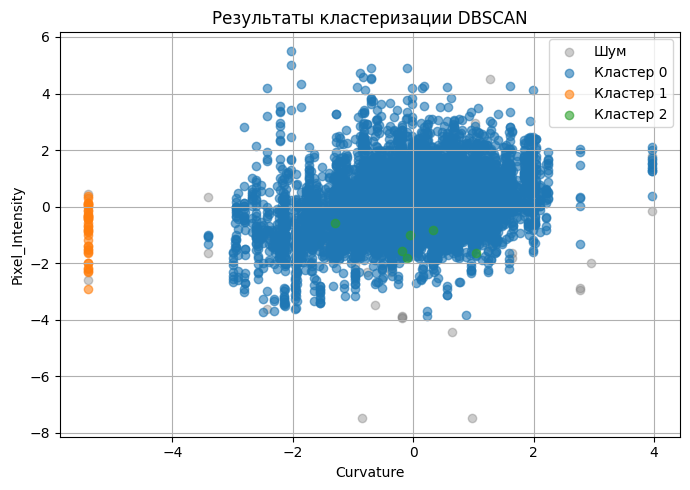

In [76]:
plt.figure(figsize=(7, 5))

for cluster in sorted(X_dbscan['Cluster'].unique()):
    subset = X_dbscan[X_dbscan['Cluster'] == cluster]
    
    if cluster == -1:
        plt.scatter(
            subset['Curvature'],
            subset['Pixel_Intensity'],
            color='gray',
            alpha=0.4,
            label='Шум'
        )
    else:
        plt.scatter(
            subset['Curvature'],
            subset['Pixel_Intensity'],
            alpha=0.6,
            label=f'Кластер {cluster}'
        )

plt.xlabel('Curvature')
plt.ylabel('Pixel_Intensity')
plt.title('Результаты кластеризации DBSCAN')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


По диаграмме рассеивания видно, что алгоритм DBSCAN выявил несколько плотных областей высокой концентрации объектов, а также выделил часть наблюдений как шум.

Для более корректной и наглядной интерпретации результатов кластеризации DBSCAN целесообразно использовать метод главных компонент (PCA).

**Метод главных компонент (PCA)** — это линейный метод снижения размерности, предназначенный для преобразования исходного набора взаимосвязанных признаков в меньшее число некоррелированных компонент, упорядоченных по убыванию объясняемой дисперсии.

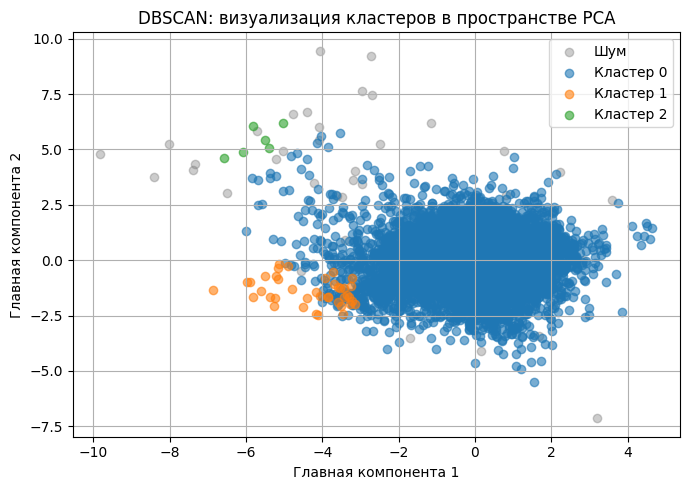

In [77]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_pca_df = pd.DataFrame(
    X_pca,
    columns=['PC1', 'PC2'],
    index=X_scaled.index
)

X_pca_df['Cluster'] = clusters_dbscan

plt.figure(figsize=(7, 5))

for cluster in sorted(X_pca_df['Cluster'].unique()):
    subset = X_pca_df[X_pca_df['Cluster'] == cluster]
    
    if cluster == -1:
        plt.scatter(
            subset['PC1'],
            subset['PC2'],
            color='gray',
            alpha=0.4,
            label='Шум'
        )
    else:
        plt.scatter(
            subset['PC1'],
            subset['PC2'],
            alpha=0.6,
            label=f'Кластер {cluster}'
        )

plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('DBSCAN: визуализация кластеров в пространстве PCA')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Вывод:** проекция данных в пространство главных компонент позволила существенно повысить наглядность кластерной структуры, выявленной методом DBSCAN.

### Интерпретация кластеров DBSCAN

#### Кластер 0 

- Наибольшее количество объектов

- Средние значения признаков близки к нулю (после стандартизации)

- Умеренные значения: кривизны (Curvature), интенсивности пикселей (Pixel_Intensity), симметрии (Symmetry)

Представляет собой типичные, наиболее распространённые символы со сбалансированной формой и структурой. Это основной «фон» данных.

#### Кластер 1

- Отличается смещением по Curvature и Pixel_Intensity

- Более выраженные структурные особенности

- Компактный, но менее плотный, чем кластер 0

Символы с более выраженной кривизной и контрастностью, вероятно содержащие дуги, изгибы или асимметричные элементы.

#### Кластер 2

- Небольшое число объектов

- Значимые отклонения по одному или нескольким признакам

- Чётко отделён от основного массива в пространстве PCA

Редкие или специфические символы с нетипичной геометрией или структурой, которые образуют локальную плотную группу.

#### Вывод: K-means эффективно выявляет крупную глобальную структуру данных, формируя компактные и интерпретируемые кластеры, однако не способен корректно работать с выбросами.

#### DBSCAN, в свою очередь, позволяет обнаружить локальные плотностные группы и шум, что делает его более гибким и информативным для анализа сложной внутренней структуры данных.

# 4. Исследование влияния параметров DBSCAN

Исследуем влияние параметров алгоритма DBSCAN на результат кластеризации.

Параметр min_samples фиксируется, так как он задаёт минимальную плотность кластера и слабо влияет на форму кластеров. Основной анализ проводится по параметру ε, который напрямую определяет структуру кластеризации.

In [78]:
min_samples = 5

eps_values = np.arange(0.8, 2.6, 0.2)

results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X_scaled)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        sil = silhouette_score(X_scaled[labels != -1], labels[labels != -1])
    else:
        sil = np.nan

    results.append([eps, n_clusters, n_noise, sil])

### Таблица результатов

In [79]:
results_df = pd.DataFrame(
    results,
    columns=['eps', 'n_clusters', 'n_noise', 'silhouette']
)

results_df

,eps,n_clusters,n_noise,silhouette
0,0.8,9,299,0.316632
1,1.0,11,151,0.344532
2,1.2,4,95,0.572164
3,1.4,4,67,0.587422
4,1.6,3,44,0.591465
5,1.8,3,33,0.591525
6,2.0,3,22,0.590998
7,2.2,3,21,0.590930
8,2.4,2,19,0.799385


### Визуализация

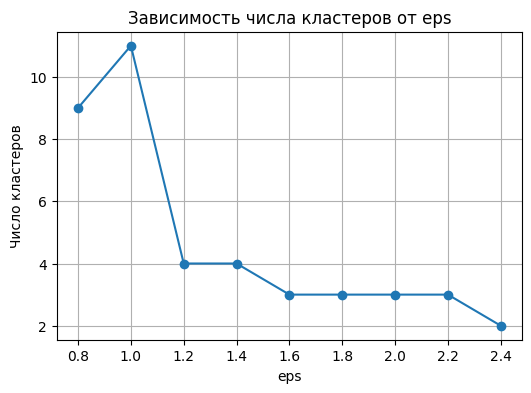

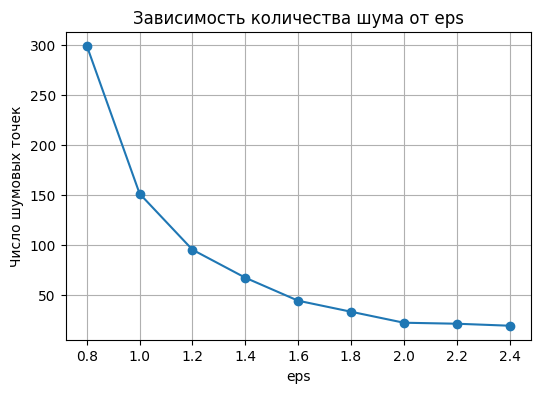

In [80]:
plt.figure(figsize=(6, 4))
plt.plot(results_df['eps'], results_df['n_clusters'], marker='o')
plt.xlabel('eps')
plt.ylabel('Число кластеров')
plt.title('Зависимость числа кластеров от eps')
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(results_df['eps'], results_df['n_noise'], marker='o')
plt.xlabel('eps')
plt.ylabel('Число шумовых точек')
plt.title('Зависимость количества шума от eps')
plt.grid(True)
plt.show()



#### Интерпретация

При ε (0.8–1.0) алгоритм формирует большое число кластеров (9–11) и выделяет значительное количество шумовых объектов, что указывает на чрезмерную чувствительность к локальной плотности и фрагментацию данных. Значения силуэтного коэффициента в этом диапазоне остаются умеренными, что свидетельствует о слабой разделимости кластеров.

В диапазоне ε = 1.2–1.4 наблюдается резкое сокращение числа кластеров до 4 и заметное снижение количества шума при одновременном росте силуэтного коэффициента. Это указывает на формирование более устойчивой и интерпретируемой кластерной структуры.

При ε = 1.6–2.2 количество кластеров стабилизируется на уровне 3, а силуэтный коэффициент достигает плато (~0.59). Данный диапазон отражает устойчивую кластеризацию с умеренным уровнем шума.

При ε = 2.4 алгоритм формирует 2 кластера с минимальным числом шумовых объектов и максимальным значением силуэтного коэффициента (0.80), что указывает на наиболее чёткое глобальное разделение данных, однако с потерей более тонкой внутренней структуры.

**Оптимальный диапазон значений ε** лежит в интервале 1.4–1.8, так как он обеспечивает баланс между:

- числом кластеров,

- качеством разделимости (силуэт),

- уровнем шумовых объектов.

# 5. Внутренние метрики качества кластеризации

- C_p и C_q — два различных кластера, p ≠ q

- d(x_i, x_j) — функция расстояния между объектами x_i и x_j 

- K — количество кластеров

- C_k — k-й кластер

### **1. Среднее внутрикластерное расстояние (intra_mean)**

Отражает среднее расстояние между объектами внутри одного кластера и характеризует его компактность. Меньшие значения указывают на более плотные и однородные кластеры.

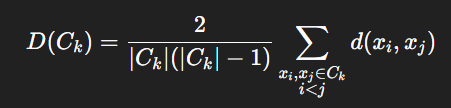

### **2. Среднее межкластерное расстояние (intercluster_mean)**

Среднее межкластерное расстояние определяется как среднее расстояние между объектами, принадлежащими разным кластерам. Метрика характеризует общую степень разделимости кластеров: чем больше значение, тем лучше кластеры изолированы друг от друга.

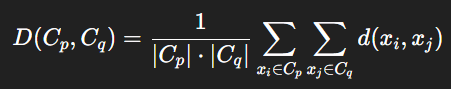


### **3. Минимальное межкластерное расстояние (intercluster_min)**

Минимальное межкластерное расстояние соответствует минимальной дистанции между ближайшими объектами из разных кластеров. Метрика чувствительна к выбросам и позволяет выявлять потенциальные точки соприкосновения или перекрытия кластеров.

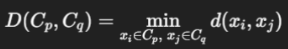

In [89]:
def intra_cluster_mean(X, labels):
    unique_labels = [l for l in np.unique(labels) if l != -1]
    distances = []

    for label in unique_labels:
        cluster_points = X[labels == label]
        if len(cluster_points) > 1:
            dists = pairwise_distances(cluster_points)
            distances.append(dists[np.triu_indices_from(dists, k=1)].mean())

    return np.mean(distances)


def inter_cluster_mean(X, labels):
    unique_labels = [l for l in np.unique(labels) if l != -1]
    centers = []

    for label in unique_labels:
        centers.append(X[labels == label].mean(axis=0))

    centers = np.array(centers)
    dists = pairwise_distances(centers)

    return dists[np.triu_indices_from(dists, k=1)].mean()


def inter_cluster_min(X, labels):
    unique_labels = [l for l in np.unique(labels) if l != -1]
    centers = []

    for label in unique_labels:
        centers.append(X[labels == label].mean(axis=0))

    centers = np.array(centers)
    dists = pairwise_distances(centers)

    return dists[np.triu_indices_from(dists, k=1)].min()

In [90]:
X_array = X_scaled.values if hasattr(X_scaled, "values") else X_scaled

intra_kmeans = intra_cluster_mean(X_array, clusters_kmeans)
inter_mean_kmeans = inter_cluster_mean(X_array, clusters_kmeans)
inter_min_kmeans = inter_cluster_min(X_array, clusters_kmeans)

intra_dbscan = intra_cluster_mean(X_array, clusters_dbscan)
inter_mean_dbscan = inter_cluster_mean(X_array, clusters_dbscan)
inter_min_dbscan = inter_cluster_min(X_array, clusters_dbscan)



### **4. Силуэт**

Пусть объект x_i принадлежит кластеру C_k.

- a(x_i) — среднее расстояние от x_i до объектов своего кластера C_k (компактность):

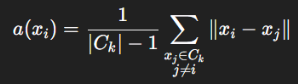

- b(x_i) — минимальное среднее расстояние от x_i до объектов другого кластера (отделимость):

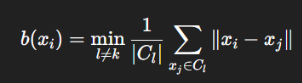

Коэффициент силуэта для объекта x_i:

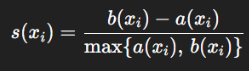


−1 ≤ s(x_i) ≤ 1

s(x_i) ≈ 1 — объект хорошо отнесён к своему кластеру

s(x_i) ≈ 0 — объект находится на границе кластеров

s(x_i) < 0 — объект, вероятно, отнесён не к тому кластеру

Средний коэффициент силуэта по всем объектам используется как мера качества всей кластеризации.

In [91]:
sil_kmeans = silhouette_score(X_scaled, clusters_kmeans)

mask = clusters_dbscan != -1
sil_dbscan = silhouette_score(X_scaled[mask], clusters_dbscan[mask])

sil_kmeans, sil_dbscan


(0.2602356922330596, 0.5916969606882293)

**Интерпретация:**

Чем выше значение силуэтного коэффициента, тем лучше кластеры отделены друг от друга и тем выше их внутренняя согласованность.

### **5. Индекс Davies–Bouldin** 

 Вычисляет компактность как расстояние от объектов кластера до их центроидов, а отделимость — как расстояние между центроидами.
 
Пусть данные разбиты на K кластеров C1,…,CK 
- Ai — центроид кластера Ci  
- Si— мера компактности кластера Ci

Относительная близость кластеров
Для пары кластеров Ci и Cj

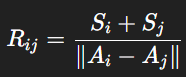

- числитель — суммарная компактность кластеров
- знаменатель — их отделимость


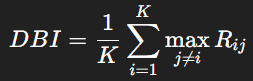


In [92]:
db_kmeans = davies_bouldin_score(X_scaled, clusters_kmeans)

db_dbscan = davies_bouldin_score(X_scaled[mask], clusters_dbscan[mask])

db_kmeans, db_dbscan

(1.5964854528354935, 0.43839579093063835)

**Интерпретация:**

Меньшее значение индекса Davies–Bouldin соответствует лучшему качеству кластеризации.

### **6. Индекс Calinski–Harabasz**

Пусть данные разбиты на K кластеров C1,…,CK
- N — общее число объектов,  
- Ai — центроид кластера Ci
- A — центроид всей выборки

Индекс Калински–Харабаза определяется как отношение межкластерной и внутрикластерной дисперсий:

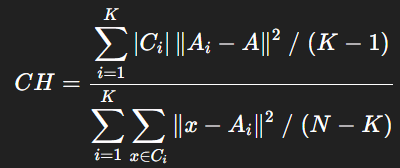

In [93]:
ch_kmeans = calinski_harabasz_score(X_scaled, clusters_kmeans)

ch_dbscan = calinski_harabasz_score(X_scaled[mask], clusters_dbscan[mask])

ch_kmeans, ch_dbscan

(2783.1517359654413, 296.21144679774983)

**Интерпретация:**

Чем выше значение индекса Calinski–Harabasz, тем более выражена кластерная структура данных.

### **Сводная таблица внутренних метрик**

In [95]:
metrics_df = pd.DataFrame({
    "Метод": ["K-means", "DBSCAN"],
    "Intra-cluster mean": [intra_kmeans, intra_dbscan],
    "Inter-cluster mean": [inter_mean_kmeans, inter_mean_dbscan],
    "Inter-cluster min": [inter_min_kmeans, inter_min_dbscan],
    "Silhouette": [sil_kmeans, sil_dbscan],
    "Davies-Bouldin": [db_kmeans, db_dbscan],
    "Calinski-Harabasz": [ch_kmeans, ch_dbscan],

})

metrics_df

,Метод,Intra-cluster mean,Inter-cluster mean,Inter-cluster min,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,K-means,2.256899,1.951850,1.951850,0.260236,1.596485,2783.151736
1,DBSCAN,1.961716,10.084749,5.541325,0.591697,0.438396,296.211447


- DBSCAN демонстрирует существенно более высокое качество кластеризации. Силуэтный коэффициент 0.59 указывает на хорошую отделимость кластеров, а низкое значение индекса Davies–Bouldin (0.44) свидетельствует о высокой компактности и чётком разделении кластеров.
Дополнительно, большое значение среднего межкластерного расстояния (Inter-cluster mean = 10.08, min = 5.54) по сравнению с внутрикластерным (1.96) подтверждает хорошую изоляцию кластеров.

- K-means показывает более слабые результаты: низкий силуэтный коэффициент (0.26) и высокое значение Davies–Bouldin (1.60) указывают на плохую разделимость и частичное перекрытие кластеров.
Несмотря на высокое значение индекса Calinski–Harabasz (2783), средние внутрикластерные (2.26) и межкластерные расстояния (1.95) практически совпадают, что говорит о недостаточной дифференциации кластеров и объясняет ограниченную информативность данного показателя в этом случае.

**Вывод**
Для рассматриваемых данных DBSCAN обеспечивает более качественную и устойчивую кластерную структуру по большинству ключевых метрик, особенно с точки зрения отделимости и интерпретируемости кластеров, тогда как K-means хуже справляется с выявлением естественной структуры данных.

# 6. Внешние метрики качества кластеризации

### Внешние метрики сравнивают результаты кластеризации с известным истинным разбиением на классы

### **1. Индекс Rand (RI)**

Индекс Rand измеряет долю пар объектов, для которых согласие между классами и кластерами сохранено.

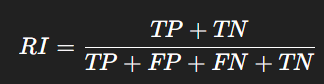

- RI∈[0,1]
- RI=1— полное совпадение кластеризации с истинными классами;
- RI=0 — отсутствие совпадений
Индекс Rand не учитывает случайные совпадения.


### K-means

In [ ]:
ri_kmeans = rand_score(y, clusters_kmeans)
ari_kmeans = adjusted_rand_score(y, clusters_kmeans)

ri_kmeans, ari_kmeans

(0.48984936977041216, 0.039335020110662575)

### DBSCAN (исключаем шум)

In [ ]:
mask = clusters_dbscan != -1

ri_dbscan = rand_score(y[mask], clusters_dbscan[mask])
ari_dbscan = adjusted_rand_score(y[mask], clusters_dbscan[mask])

ri_dbscan, ari_dbscan

(0.23366032035756124, -0.0014708574325879356)

### **2. Скорректированный индекс Rand (ARI)**

### ARI — модификация индекса Rand с поправкой на случайные совпадения.

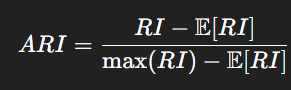


ARI∈[−1,1]
- ARI=1 — идеальное совпадение;
- ARI≈0 — совпадение на уровне случайного;
- отрицательные значения — хуже случайного разбиения.

ARI является более корректной и устойчивой метрикой, чем RI.

In [ ]:
external_metrics_df = pd.DataFrame({
    "Метод": ["K-means", "DBSCAN"],
    "Rand Index": [ri_kmeans, ri_dbscan],
    "Adjusted Rand Index": [ari_kmeans, ari_dbscan]
})

external_metrics_df


,Метод,Rand Index,Adjusted Rand Index
0,K-means,0.489849,0.039335
1,DBSCAN,0.233660,-0.001471


**Вывод:** по значениям Rand Index и скорректированного индекса Rand метод K-means демонстрирует более высокое соответствие истинному разбиению на классы по сравнению с DBSCAN. Это указывает на то, что кластеры, полученные методом K-means, в большей степени согласуются с исходными метками классов.

Низкие и близкие к нулю значения ARI для DBSCAN свидетельствуют о слабом совпадении кластерной структуры с заданной разметкой, что может быть связано с ориентацией DBSCAN на плотностную структуру данных, не совпадающую с исходными классами.

# Заключение

В ходе работы был проведён полный цикл предварительного анализа и кластеризации многомерных данных: выполнено исследование распределений признаков, корреляционный и дисперсионный анализ, отбор информативных признаков и стандартизация данных. На основе анализа структуры данных и визуализаций были выбраны и реализованы два метода кластеризации — K-means и DBSCAN.
Результаты внутренней оценки качества показали преимущество DBSCAN с точки зрения компактности и отделимости кластеров, что свидетельствует о способности метода выявлять плотностную структуру данных и устойчиво работать с выбросами. В то же время внешние метрики продемонстрировали более высокое соответствие кластеров K-means исходным классам, что указывает на лучшую согласованность данного метода с заданной разметкой.

Таким образом, выбор метода кластеризации зависит от цели анализа: DBSCAN более эффективен для выявления естественной структуры данных без опоры на априорные классы, тогда как K-means обеспечивает лучшее приближение к существующему разбиению на классы.